Thinkful Bootcamp Course

Author: Ian Heaton

Email: iheaton@gmail.com

Mentor: Nemanja Radojkovic

Date: 2017/03/21


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

sb.set_style('darkgrid')

# Feature Selection 
## For red and white variants of the Portuguese "Vinho Verde" wine

Vinho Verde is not a grape variety, it is a DOC for the production of wine. The name literally means "green wine," but translates as "young wine". It may be red, white, rosé and are usually consumed soon after bottling. Although a Vinho Verde can also be a sparkling, a Late Harvest or even Brandy. In its early years of production, the slight effervesce of the wine came from malolactic fermentation taking place in the bottle. In winemaking this is usually considered a wine fault but Vinho Verde producers found that consumers liked the slightly fizzy nature. However, the wines had to be packaged in opaque bottles in order to hide the unseemly turbidity and sediment that the "in-bottle MLF" produced. Today, most Vinho Verde producers no longer follow this practice with the slight sparkle being added by artificial carbonation.

The region is characterized by its many small growers, which numbered around 19,000 as of 2014. Many of these growers used to train their vines high off the ground, up trees, fences, and even telephone poles so that they could cultivate vegetable crops below the vines that their families may use as a food source [1].

In [25]:
data_file = '/media/ianh/space/ThinkfulData/Wine/combination_white_red.csv'
origin_df = pd.read_csv(data_file)

In [26]:
def retrieve_metadata(dataframe):
    """
     Extracts the shape, column names and number of null rows for
     each column of a Pandas data frame. This information is printed
     to standard ouput.

     Args:
        dataframe (dataframe): The Pandas data frame of interest

     Returns:
        Nothing
    """
    num_rows, num_columns = dataframe.shape
    columns = dataframe.columns.values.tolist()
    print('Data frame contains %d columns and %d rows' % (num_columns, num_rows))
    for elem in columns:
        print('column %s has %d empty rows'% (elem, sum(dataframe[elem].isnull())))

In [27]:
retrieve_metadata(origin_df)

Data frame contains 13 columns and 6497 rows
column type has 0 empty rows
column fixed_acidity has 0 empty rows
column volatile_acidity has 0 empty rows
column citric_acid has 0 empty rows
column residual_sugar has 0 empty rows
column chlorides has 0 empty rows
column free_sulfur_dioxide has 0 empty rows
column total_sulfur_dioxide has 0 empty rows
column density has 0 empty rows
column pH has 0 empty rows
column sulphates has 0 empty rows
column alcohol has 0 empty rows
column quality has 0 empty rows


Determine if any of the column data has distributions that are not normal and look for attributes that maybe associated with other attributes.

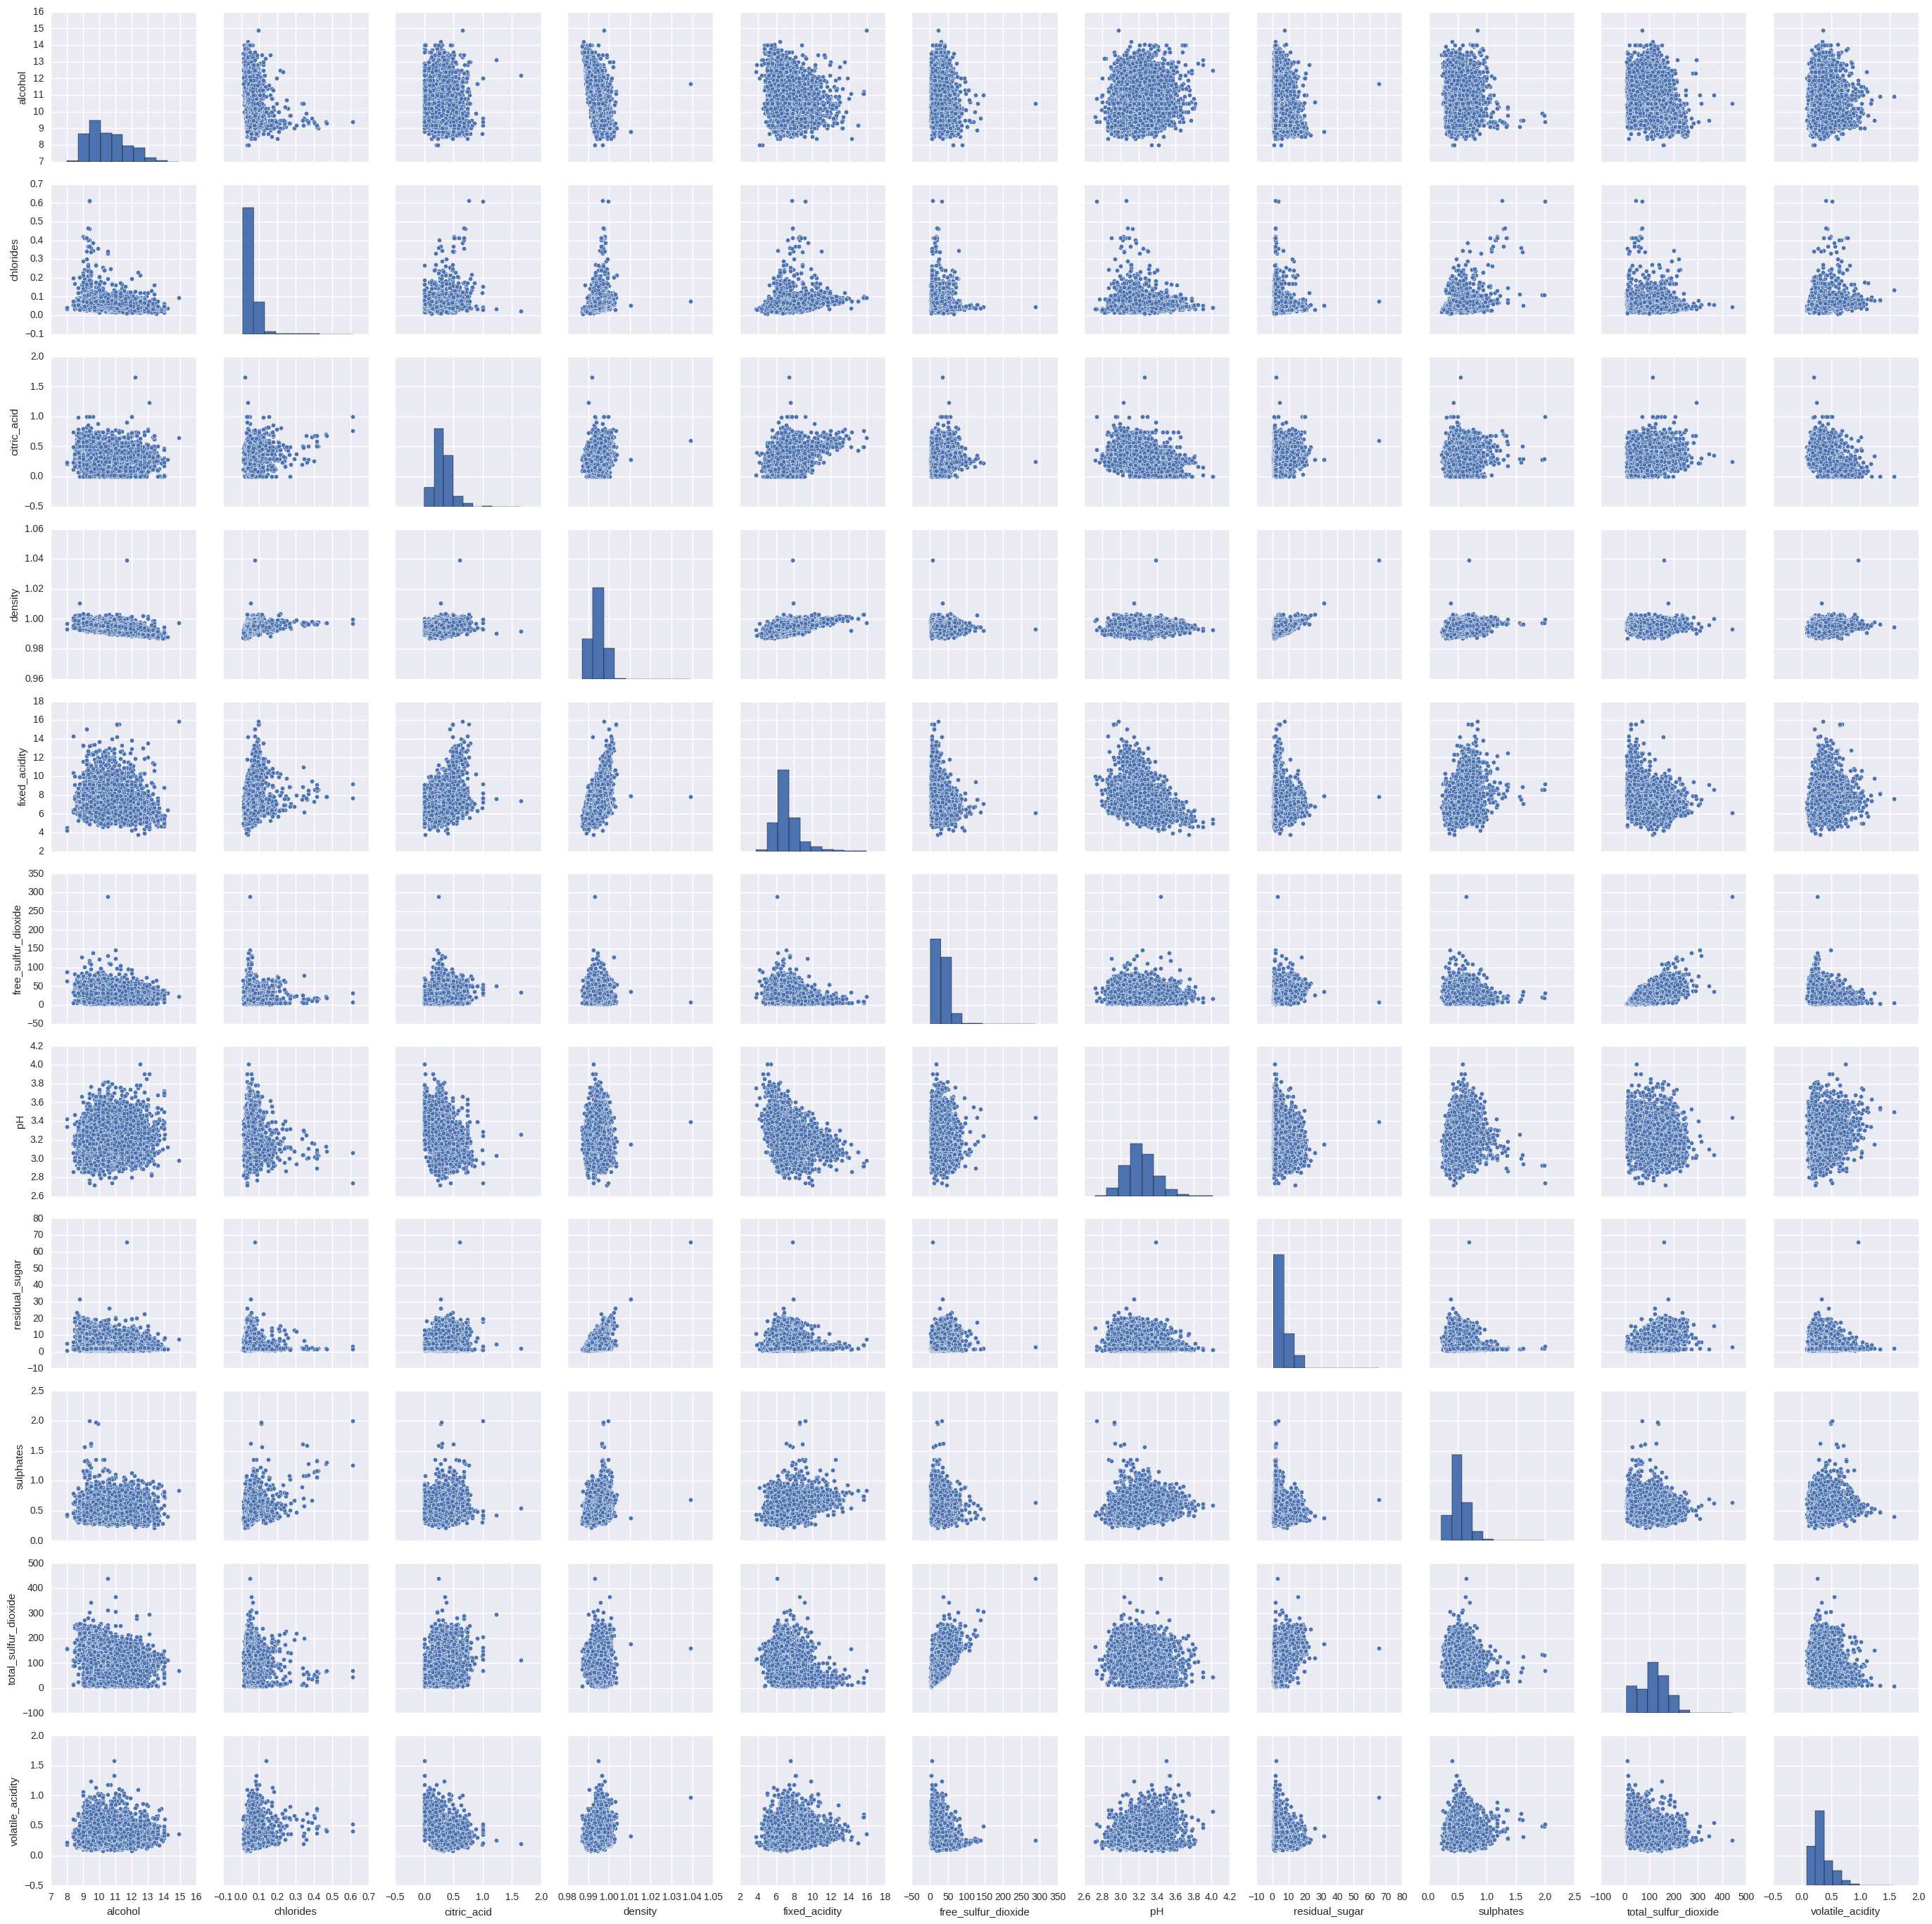

In [72]:
exclude = ['quality', 'type']
sb.pairplot(origin_df.ix[:, origin_df.columns.difference(exclude)])
plt.show()

It appears that only pH has a normal distribution and density has associations with other attributes most notably  residual sugars.

### Feature 2 - Fixed Acidity

Fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

Fixed Acidity does not have a normal distribution so column data will need to be transformed. 

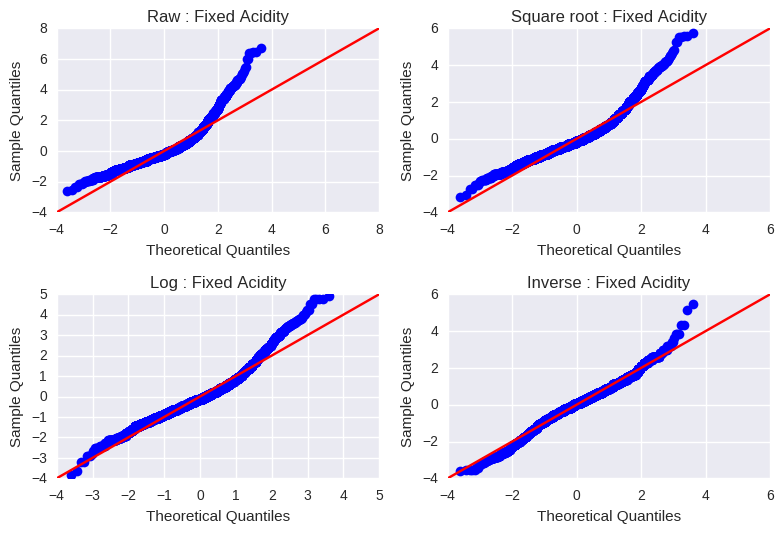

In [59]:
features = pd.get_dummies(origin_df.type)
# ///////////////////////// #
fig = plt.figure()

ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(origin_df.fixed_acidity, line='45', fit=True, ax=ax)
ax.set_title('Raw : Fixed Acidity')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(origin_df.fixed_acidity), line='45', fit=True, ax=ax)
ax.set_title('Square root : Fixed Acidity')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(np.log(origin_df.fixed_acidity), line='45', fit=True, ax=ax)
ax.set_title('Log : Fixed Acidity')

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(1/origin_df.fixed_acidity, line='45', fit=True, ax=ax)
ax.set_title('Inverse : Fixed Acidity')


plt.tight_layout()
plt.show()

### Feature 3 - Volatile Acidity

Volatile Acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

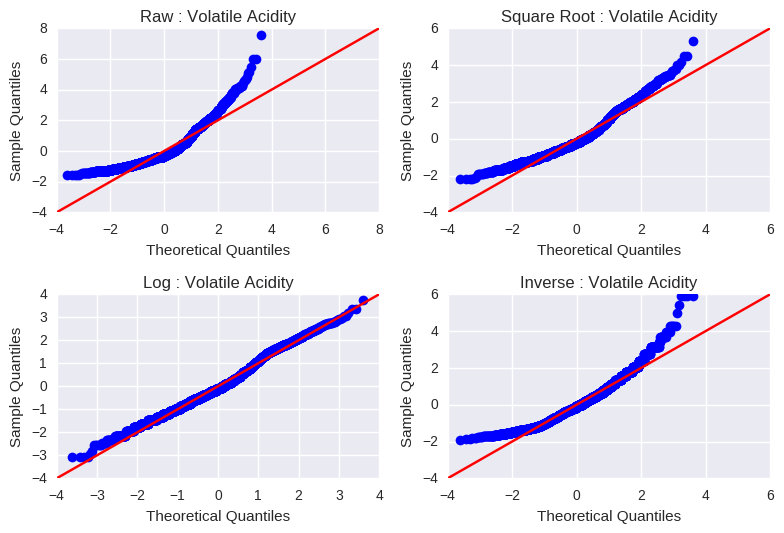

In [63]:
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(origin_df.volatile_acidity, line='45', fit=True, ax=ax)
ax.set_title('Raw : Volatile Acidity')

ax = fig.add_subplot(2, 2, 2) 
sm.graphics.qqplot(np.sqrt(origin_df.volatile_acidity), line='45', fit=True, ax=ax)
ax.set_title('Square Root : Volatile Acidity')

ax = fig.add_subplot(2, 2, 3) 
sm.graphics.qqplot(np.log(origin_df.volatile_acidity), line='45', fit=True, ax=ax)
ax.set_title('Log : Volatile Acidity')

ax = fig.add_subplot(2, 2, 4) 
sm.graphics.qqplot(1/origin_df.volatile_acidity, line='45', fit=True, ax=ax)
ax.set_title('Inverse : Volatile Acidity')

plt.tight_layout()
plt.show()

# Adding log transformed data points to feature data frame.
features['volatile_acidity'] = np.log(origin_df.volatile_acidity)

### Feature 4 - Citric Acid

Citric Acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

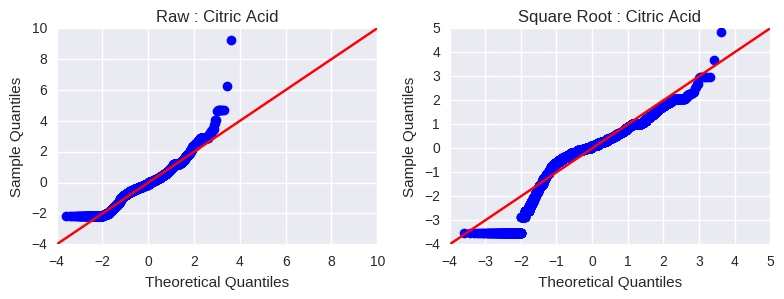

In [56]:
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(origin_df.citric_acid, line='45', fit=True, ax=ax)
ax.set_title('Raw : Citric Acid')

ax = fig.add_subplot(2, 2, 2) 
sm.graphics.qqplot(np.sqrt(origin_df.citric_acid), line='45', fit=True, ax=ax)
ax.set_title('Square Root : Citric Acid')

plt.tight_layout()
plt.show()

# Adding square root transformed data points to feature data frame.
features['citric_acid'] = np.sqrt(origin_df.citric_acid)

### Feature 5 - Residual Sugar

Residual Sugar : the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

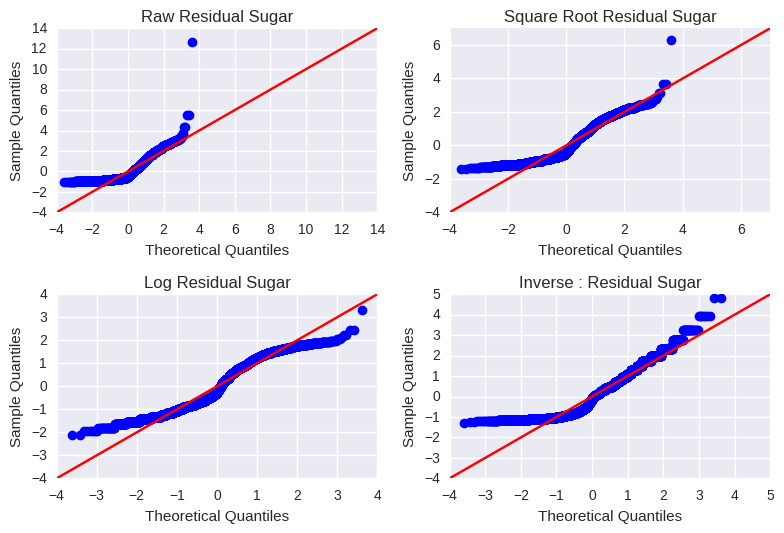

In [62]:
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(origin_df.residual_sugar, line='45', fit=True, ax=ax)
ax.set_title('Raw : Residual Sugar')

ax = fig.add_subplot(2, 2, 2) 
sm.graphics.qqplot(np.sqrt(origin_df.residual_sugar), line='45', fit=True, ax=ax)
ax.set_title('Square Root : Residual Sugar')

ax = fig.add_subplot(2, 2, 3) 
sm.graphics.qqplot(np.log(origin_df.residual_sugar), line='45', fit=True, ax=ax)
ax.set_title('Log : Residual Sugar')

ax = fig.add_subplot(2, 2, 4) 
sm.graphics.qqplot(1/origin_df.residual_sugar, line='45', fit=True, ax=ax)
ax.set_title('Inverse : Residual Sugar')

plt.tight_layout()
plt.show()

# Taking the inverse of the raw data and adding them to feature data frame.
features['citric_acid'] = 1/(origin_df.residual_sugar): 

### Feature 6 - Chlorides

Chlorides : the amount of salt in the wine

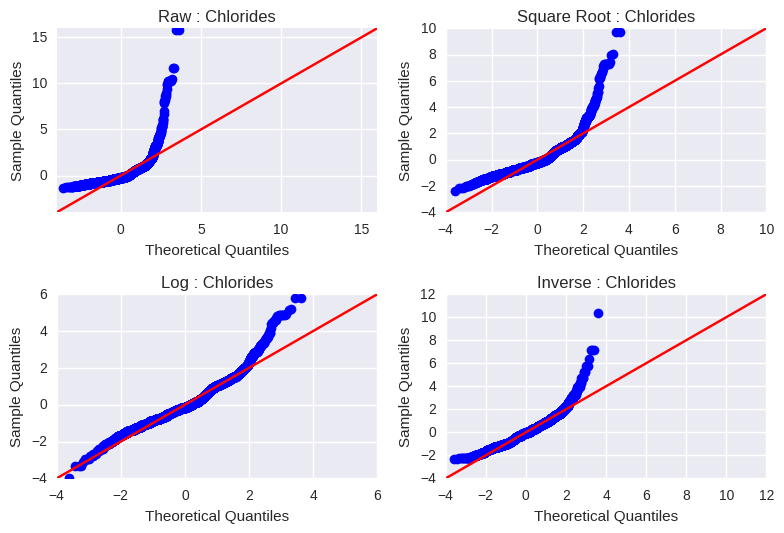

In [65]:
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(origin_df.chlorides, line='45', fit=True, ax=ax)
ax.set_title('Raw : Chlorides')

ax = fig.add_subplot(2, 2, 2) 
sm.graphics.qqplot(np.sqrt(origin_df.chlorides), line='45', fit=True, ax=ax)
ax.set_title('Square Root : Chlorides')

ax = fig.add_subplot(2, 2, 3) 
sm.graphics.qqplot(np.log(origin_df.chlorides), line='45', fit=True, ax=ax)
ax.set_title('Log : Chlorides')

ax = fig.add_subplot(2, 2, 4) 
sm.graphics.qqplot(1/origin_df.chlorides, line='45', fit=True, ax=ax)
ax.set_title('Inverse : Chlorides')

plt.tight_layout()
plt.show()

# Taking the log of the raw data and adding them to feature data frame.
features['chlorides'] = np.log(origin_df.chlorides)

### Feature 7 - Free Sulfur Dioxide

Free Sulfur Dioxide : the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

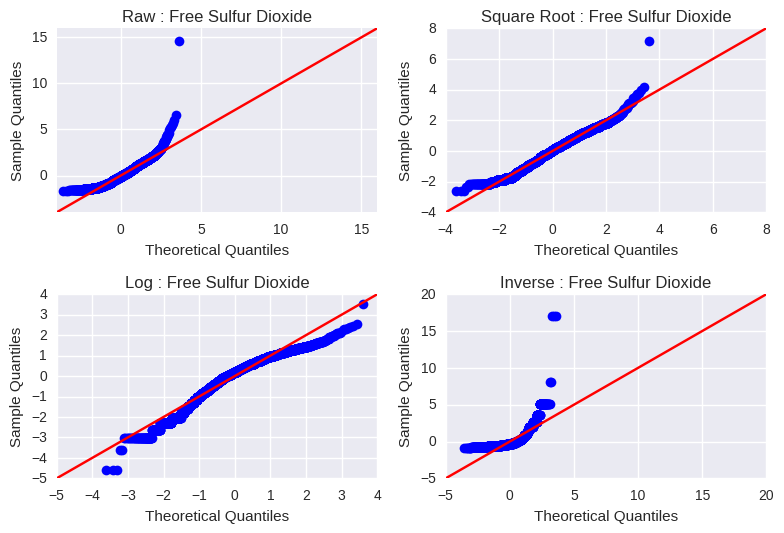

In [67]:
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(origin_df.free_sulfur_dioxide, line='45', fit=True, ax=ax)
ax.set_title('Raw : Free Sulfur Dioxide')

ax = fig.add_subplot(2, 2, 2) 
sm.graphics.qqplot(np.sqrt(origin_df.free_sulfur_dioxide), line='45', fit=True, ax=ax)
ax.set_title('Square Root : Free Sulfur Dioxide')

ax = fig.add_subplot(2, 2, 3) 
sm.graphics.qqplot(np.log(origin_df.free_sulfur_dioxide), line='45', fit=True, ax=ax)
ax.set_title('Log : Free Sulfur Dioxide')

ax = fig.add_subplot(2, 2, 4) 
sm.graphics.qqplot(1/origin_df.free_sulfur_dioxide, line='45', fit=True, ax=ax)
ax.set_title('Inverse : Free Sulfur Dioxide')

plt.tight_layout()
plt.show()

# Taking the sqaure root of the raw data and adding them to feature data frame.
features['free_sulfur_dioxide'] = np.log(origin_df.free_sulfur_dioxide)

### Feature 8 -  Total Sulfur Dioxide

 Total Sulfur Dioxide : amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

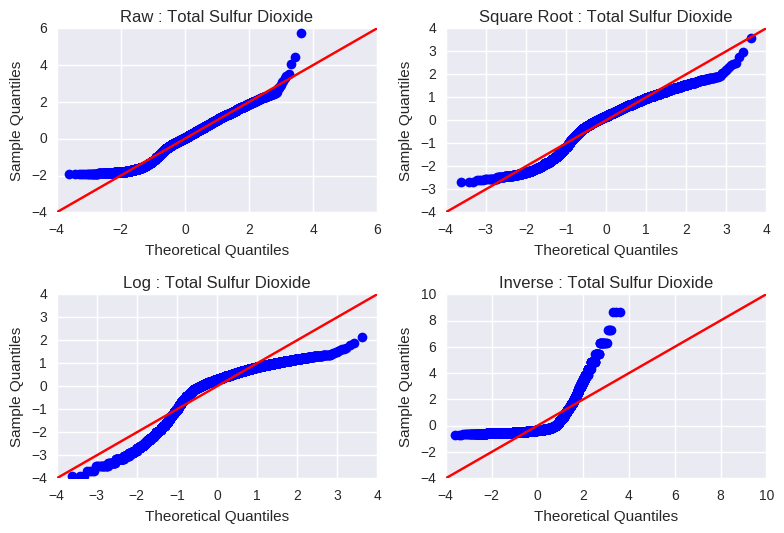

In [69]:
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(origin_df.total_sulfur_dioxide, line='45', fit=True, ax=ax)
ax.set_title('Raw : Total Sulfur Dioxide')

ax = fig.add_subplot(2, 2, 2) 
sm.graphics.qqplot(np.sqrt(origin_df.total_sulfur_dioxide), line='45', fit=True, ax=ax)
ax.set_title('Square Root : Total Sulfur Dioxide')

ax = fig.add_subplot(2, 2, 3) 
sm.graphics.qqplot(np.log(origin_df.total_sulfur_dioxide), line='45', fit=True, ax=ax)
ax.set_title('Log : Total Sulfur Dioxide')

ax = fig.add_subplot(2, 2, 4) 
sm.graphics.qqplot(1/origin_df.total_sulfur_dioxide, line='45', fit=True, ax=ax)
ax.set_title('Inverse : Total Sulfur Dioxide')

plt.tight_layout()
plt.show()

# Taking the raw data and adding them to feature data frame.
features['total_sulfur_dioxide'] = origin_df.total_sulfur_dioxide

### Feature 9 - Density

Density : the density of wine is close to that of water depending on the percent alcohol and sugar content.

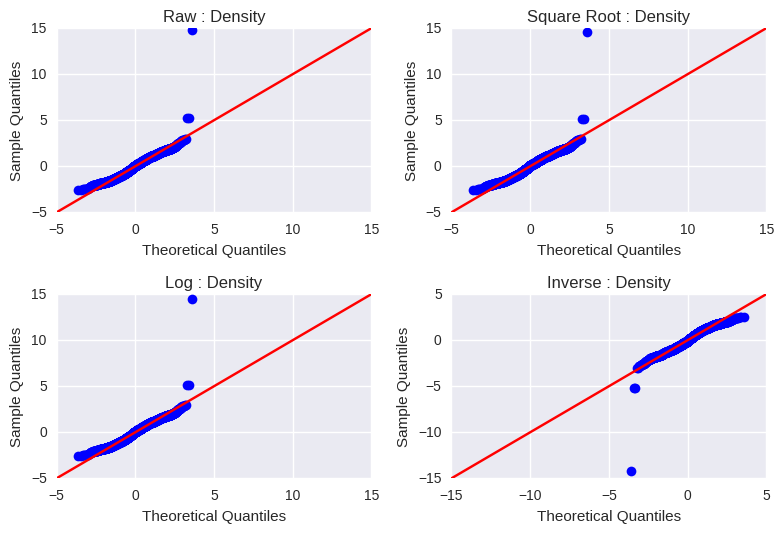

In [74]:
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(origin_df.density, line='45', fit=True, ax=ax)
ax.set_title('Raw : Density')

ax = fig.add_subplot(2, 2, 2) 
sm.graphics.qqplot(np.sqrt(origin_df.density), line='45', fit=True, ax=ax)
ax.set_title('Square Root : Density')

ax = fig.add_subplot(2, 2, 3) 
sm.graphics.qqplot(np.log(origin_df.density), line='45', fit=True, ax=ax)
ax.set_title('Log : Density')

ax = fig.add_subplot(2, 2, 4) 
sm.graphics.qqplot(1/origin_df.density, line='45', fit=True, ax=ax)
ax.set_title('Inverse : Density')

plt.tight_layout()
plt.show()

# Taking the raw data and adding them to feature data frame.
# features['density'] = origin_df.density

### Feature 10 - pH

pH : Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

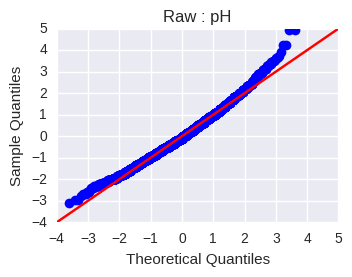

In [77]:
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(origin_df.pH, line='45', fit=True, ax=ax)
ax.set_title('Raw : pH')
plt.show()

# Taking the raw data and adding them to feature data frame.
features['pH'] = origin_df.pH

### Feature 11 - Sulphates

Sulphates : a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

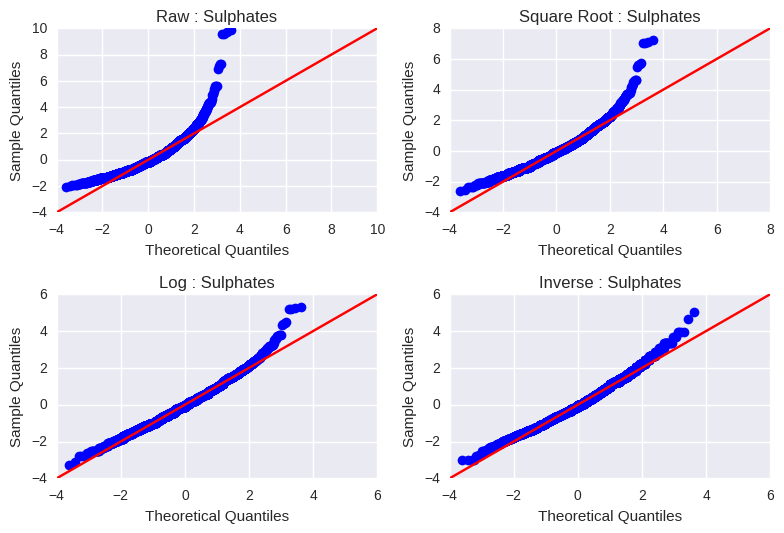

In [79]:
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(origin_df.sulphates, line='45', fit=True, ax=ax)
ax.set_title('Raw : Sulphates')

ax = fig.add_subplot(2, 2, 2) 
sm.graphics.qqplot(np.sqrt(origin_df.sulphates), line='45', fit=True, ax=ax)
ax.set_title('Square Root : Sulphates')

ax = fig.add_subplot(2, 2, 3) 
sm.graphics.qqplot(np.log(origin_df.sulphates), line='45', fit=True, ax=ax)
ax.set_title('Log : Sulphates')

ax = fig.add_subplot(2, 2, 4) 
sm.graphics.qqplot(1/origin_df.sulphates, line='45', fit=True, ax=ax)
ax.set_title('Inverse : Sulphates')

plt.tight_layout()
plt.show()

# Taking the inverse of the raw data and adding them to feature data frame.
features['sulphates'] = origin_df.sulphates

### Feature 12 - Alcohol

Alcohol : The percent alcohol content of the wine.

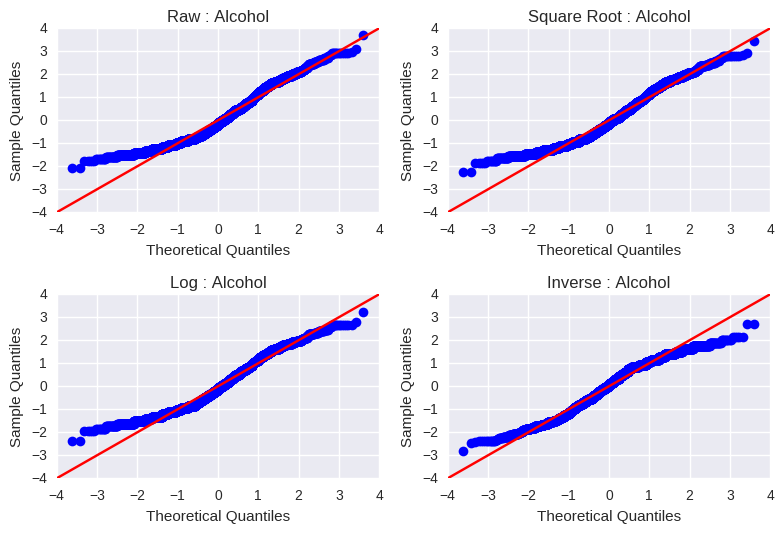

In [82]:
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(origin_df.alcohol, line='45', fit=True, ax=ax)
ax.set_title('Raw : Alcohol')

ax = fig.add_subplot(2, 2, 2) 
sm.graphics.qqplot(np.sqrt(origin_df.alcohol), line='45', fit=True, ax=ax)
ax.set_title('Square Root : Alcohol')

ax = fig.add_subplot(2, 2, 3) 
sm.graphics.qqplot(np.log(origin_df.alcohol), line='45', fit=True, ax=ax)
ax.set_title('Log : Alcohol')

ax = fig.add_subplot(2, 2, 4) 
sm.graphics.qqplot(1/origin_df.alcohol, line='45', fit=True, ax=ax)
ax.set_title('Inverse : Alcohol')

plt.tight_layout()
plt.show()

# Taking the raw data and adding them to feature data frame.
features['alcohol'] = origin_df.alcohol